In [126]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [127]:
# arguments for training
args = {'lr':0.01,
        'epochs':5000,
        'noise':0.01,
        'train size':0.7,
        'spec scale':10**12,
        'loss function':nn.L1Loss(),
        'optimizer function': torch.optim.Adam,
        'input features': 20
        }

num_layers = 11

In [128]:
# fn to convert dataframes to tensors
def df_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Preparing Data

In [129]:
df = pd.read_excel('wide_range.xlsx')

In [130]:
# first columns of excel sheet is temperature data, then spectral data
y = df.iloc[:,:num_layers]
X = df.iloc[:,num_layers:]

# scale the spectral data appropriately
X = X.apply(lambda x: x*args['spec scale'])

# add noise
noise = np.random.normal(loc=0, scale=args['noise'], size=X.shape)
X = X + noise

# split the data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=args['train size'], random_state=101)

# index the data
X_train.index = range(len(X_train))
X_test.index = range(len(X_test))

In [131]:
layers = []
for i in range(1,12):
    layers.append({'layer':i,
                   'col': f'layer {i}'})
    
print(layers)

[{'layer': 1, 'col': 'layer 1'}, {'layer': 2, 'col': 'layer 2'}, {'layer': 3, 'col': 'layer 3'}, {'layer': 4, 'col': 'layer 4'}, {'layer': 5, 'col': 'layer 5'}, {'layer': 6, 'col': 'layer 6'}, {'layer': 7, 'col': 'layer 7'}, {'layer': 8, 'col': 'layer 8'}, {'layer': 9, 'col': 'layer 9'}, {'layer': 10, 'col': 'layer 10'}, {'layer': 11, 'col': 'layer 11'}]


In [132]:
'''In order to do feature extraction with this sequential model, I am going to have first find the best spectral features for each layer, 
store those features (maybe in a dictionary?), and then use those selected spectral features plus the previous temperature outputs for each layer.
It seems in the training loop I will have to define some sort of tensor for the previous temperature predictions, update that tensor each
iteration of the training loop to have an additional column corresponding to the previous layer's temperature prediction, and then combine the
updated temperature tensor with the specific spectral tensor for that layer.'''

# feature extraction
# linear_model = LinearRegression()
# rfe = RFE(estimator=linear_model, n_features_to_select=args['input features'])

# for layer in layers:
#     col = layer['col']

#     X_selected = rfe.fit_transform(X, y[col])
#     selected_feature_indices = rfe.get_support(indices=True)
    
#     features = []
#     for i in selected_feature_indices:
#         features.append(X.columns[i])

#     layer['features'] = features

"In order to do feature extraction with this sequential model, I am going to have first find the best spectral features for each layer, \nstore those features (maybe in a dictionary?), and then use those selected spectral features plus the previous temperature outputs for each layer.\nIt seems in the training loop I will have to define some sort of tensor for the previous temperature predictions, update that tensor each\niteration of the training loop to have an additional column corresponding to the previous layer's temperature prediction, and then combine the\nupdated temperature tensor with the specific spectral tensor for that layer."

In [133]:
X_train

,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
0,0.045682,0.032845,0.062238,0.050228,0.089342,0.060986,0.113566,0.068529,0.103987,0.135874,...,3.672849,3.698495,3.745165,3.785854,3.794030,3.820509,3.794837,3.705795,3.554285,3.434761
1,0.043740,0.028682,0.070820,0.033226,0.057270,0.064295,0.090953,0.056033,0.097329,0.117189,...,2.323981,2.351582,2.385149,2.421245,2.439197,2.444689,2.447649,2.384452,2.307820,2.228088
2,0.015992,0.012008,0.023622,0.014027,0.030375,0.040701,0.043280,0.013642,0.046026,0.064594,...,1.787378,1.827481,1.868609,1.872216,1.900010,1.918494,1.902502,1.869954,1.766152,1.751599
3,0.022092,0.014185,0.010294,0.010601,0.026763,0.032831,0.052976,0.042770,0.047900,0.078247,...,4.606220,4.689311,4.735480,4.784997,4.797010,4.794295,4.730006,4.615561,4.448264,4.297551
4,0.012896,0.021290,0.024142,-0.000962,-0.009704,0.022457,0.027090,0.015024,0.035471,0.037217,...,1.630514,1.650866,1.694608,1.715467,1.750719,1.754940,1.743341,1.706847,1.659243,1.614180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,0.015606,0.017725,0.027443,-0.002176,0.009827,0.021461,0.018823,-0.001084,0.030615,0.009226,...,1.751906,1.762477,1.806633,1.816903,1.845402,1.852720,1.844764,1.812512,1.757560,1.697906
1536,0.006608,0.016499,0.011912,0.021982,0.031335,0.036513,0.058555,0.041109,0.057355,0.073570,...,1.876142,1.903163,1.933058,1.981750,1.984126,2.003101,1.996441,1.950380,1.904574,1.812641
1537,0.061395,0.039095,0.072493,0.039106,0.081676,0.079927,0.121897,0.084252,0.133942,0.144805,...,5.340522,5.419791,5.466940,5.492892,5.528588,5.522992,5.461438,5.318359,5.107435,4.928362
1538,0.024263,0.008432,0.015608,0.014651,0.024859,0.016690,0.036323,0.021272,0.051048,0.065109,...,2.571726,2.615554,2.651290,2.666919,2.713512,2.730987,2.692180,2.648956,2.539499,2.480366


In [134]:
y_train

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11
805,370.341309,328.561339,326.246196,325.960978,337.115108,338.011684,329.244973,338.854172,334.003205,331.473263,344.660386
1798,358.717780,321.142036,335.121747,323.227587,334.855686,331.980768,331.899256,332.369302,336.197365,344.170862,318.387290
193,303.578596,296.012106,320.139477,331.612634,343.149874,341.599287,327.050020,312.050438,300.909822,290.052707,305.241303
162,281.108362,326.802138,327.622403,330.956774,328.315642,325.316098,330.881045,323.297827,335.718231,335.832163,359.882238
1211,300.756094,302.244654,302.319500,307.933527,316.877701,315.324771,318.254083,318.875332,313.324653,307.896394,301.072836
...,...,...,...,...,...,...,...,...,...,...,...
599,274.142753,312.028924,305.203144,306.792005,301.311853,291.127893,298.271076,303.973224,308.318167,319.322458,303.811769
1599,318.512434,351.712729,343.852709,337.011663,325.408620,325.728092,318.063111,309.798561,314.474813,297.388722,307.688462
1361,370.224132,340.547318,330.792273,325.245505,318.753576,321.749459,328.052407,338.216759,343.711867,361.540581,369.965830
1547,308.722907,320.029113,305.872919,303.670763,308.517581,320.283005,326.395634,328.204725,333.495631,311.017505,324.166657


# Creating Models

In [135]:
# define the network architecture
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(input_size, 45)
        self.lin2 = nn.Linear(45, 60)
        self.lin3 = nn.Linear(60, 75)
        self.lin4 = nn.Linear(75, 60)
        self.lin_fin = nn.Linear(60, output_size)


    def forward(self, x):
        x = F.leaky_relu(self.lin1(x))
        x = F.leaky_relu(self.lin2(x))
        x = F.leaky_relu(self.lin3(x))
        x = F.leaky_relu(self.lin4(x))
        x = self.lin_fin(x)
        return x
    

print

<function print>

In [136]:
# define input size (number of spectral data points) and output size (predicting one layer at a time)
input_size = args['input features']
output_size = 1

print(f' input size: {input_size}, output size: {output_size}')


# feature extraction
rfe = RFE(estimator=LinearRegression(), n_features_to_select=args['input features'])

# define a dictionary with seperate models for each layer; change input_size appropriately
models = {}
spec_features = {}
for i in range(num_layers):
    layer = 11 - i
    print(f'Layer {layer}')

    models[f'model{layer}'] = Net(input_size + i, output_size)

    rfe.fit(X_train, y_train.iloc[:, layer - 1])
    selected_features = rfe.get_support(indices=True).tolist()
    spec_features[f'layer{layer}_features'] = selected_features

print(spec_features)

 input size: 20, output size: 1
Layer 11


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 10


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 9


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 8


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 7


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 6


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 5


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 4


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 3


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 2


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Layer 1


/Users/aidenkarpf/anaconda3/lib/python3.10/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


{'layer11_features': [32, 34, 36, 58, 59, 60, 61, 66, 68, 69, 70, 71, 72, 73, 74, 77, 82, 83, 84, 85], 'layer10_features': [28, 29, 30, 31, 33, 34, 36, 39, 51, 53, 54, 55, 56, 57, 58, 61, 62, 75, 76, 77], 'layer9_features': [45, 46, 47, 48, 49, 50, 52, 54, 62, 63, 64, 65, 66, 67, 68, 69, 80, 81, 83, 84], 'layer8_features': [13, 20, 21, 22, 23, 24, 33, 44, 48, 49, 52, 63, 64, 66, 67, 69, 72, 79, 83, 85], 'layer7_features': [13, 14, 19, 20, 21, 22, 23, 24, 25, 32, 33, 37, 39, 45, 48, 59, 60, 66, 84, 85], 'layer6_features': [2, 4, 6, 7, 19, 20, 21, 22, 23, 24, 33, 36, 57, 58, 59, 63, 70, 73, 75, 79], 'layer5_features': [2, 4, 5, 6, 8, 9, 14, 17, 18, 19, 20, 34, 46, 47, 48, 65, 66, 68, 69, 84], 'layer4_features': [2, 3, 4, 5, 6, 8, 13, 14, 17, 18, 19, 24, 25, 26, 48, 65, 66, 69, 82, 84], 'layer3_features': [4, 5, 6, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 62, 66, 67, 82, 85], 'layer2_features': [0, 5, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 33, 37, 42, 59, 82], 'layer1_

# Training

In [137]:
learning_rate = args['lr']
criterion = args['loss function']
num_epochs = args['epochs']
optim = args['optimizer function']

In [142]:
loss_lists = {}
prev_pred = None
prev_models = []
best_losses = []

# define original input as solely spectal data
inputs = df_to_tensor(X_train)

for i in range(num_layers):
    best_loss = np.inf

    layer = 11 - i
    print(f'Layer {layer}')

    # define loss list for each layer with loss_lists dictionary
    loss_lists[f'loss_list{layer}'] = []

    # freeze the parameters of the previous models
    for prev_model in prev_models:
        for param in prev_model.parameters():
            param.requires_grad = False

    # define the model corresponding to the given layer
    model = models[f'model{layer}']
    prev_models.append(model)

    # define optimizer corresponding to the given model
    optimizer = optim(models[f'model{layer}'].parameters(), lr=learning_rate)

    # get selected features for the current layer
    selected_features = spec_features[f'layer{layer}_features']

    # filter inputs using selected features
    inputs = inputs[:, selected_features]

    # add all previous temperatuer predictions to inputs
    # THIS IS WHERE YOU LEFT OFF!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # REDEFINE THE PREV_PRED TENSOR TO INCLUDE ALLLLLL PREVIOUS FEATURES AND RESHAPE THE PREV_PRED TENSOR APPROPRIATELY
    if i > 0:
        prev_pred = pred_temp.clone().detach().reshape(-i, 1)
        inputs = torch.cat([inputs, prev_pred], dim=1)

    # get expected_temp for the corresponding layer (use correct column of temperature data)
    expected_temp = df_to_tensor(y_train.iloc[:,layer - 1]).reshape(-1,1)


    # begin training loop
    for epoch in range(num_epochs):
        # empty gradients
        optimizer.zero_grad()

        # forward pass
        pred_temp = model(inputs)

        # calculate loss and add to loss list
        loss = criterion(pred_temp, expected_temp)
        loss_lists[f'loss_list{layer}'].append(loss.item())

        # backward pass
        loss.backward()
        
        # update parameters based on computed gradients
        optimizer.step()

        # print losses
        if (epoch+1) % int(args['epochs']/10) == 0:
            print(f'epoch: {epoch+1}, loss = {loss}')


        # find best loss
        if loss < best_loss:
            best_loss = loss
            best_epoch = epoch + 1

    best_losses.append(best_loss.item())




Layer 11
epoch: 500, loss = 31.21013641357422
epoch: 1000, loss = 5.1049323081970215
epoch: 1500, loss = 7.898983478546143


KeyboardInterrupt: 

# Plot Losses

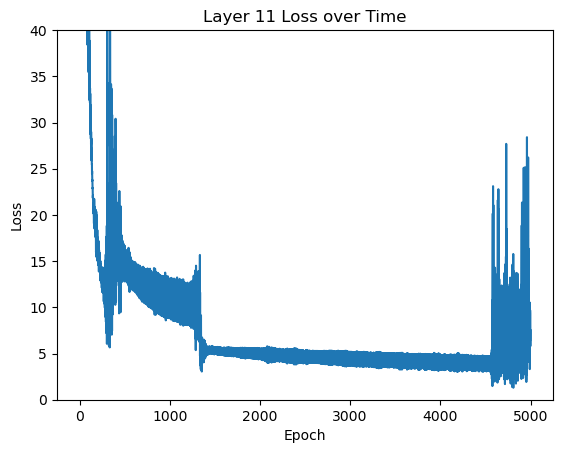

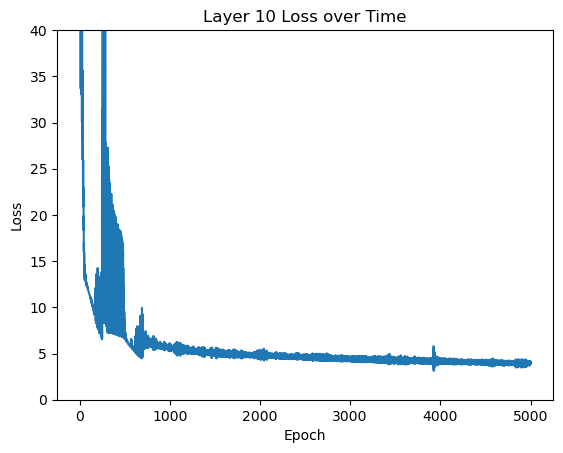

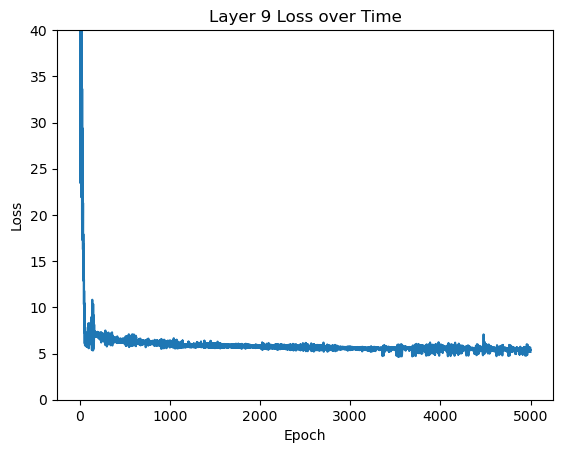

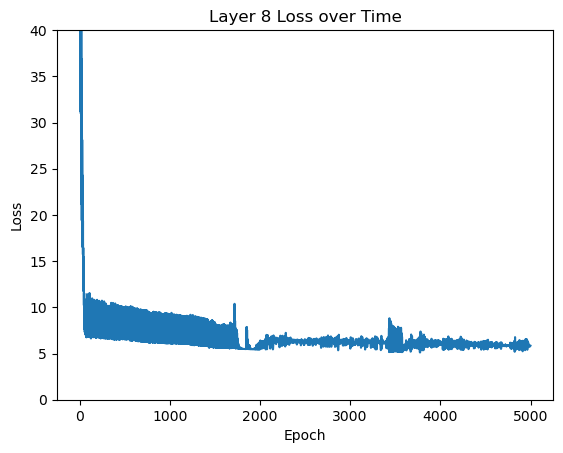

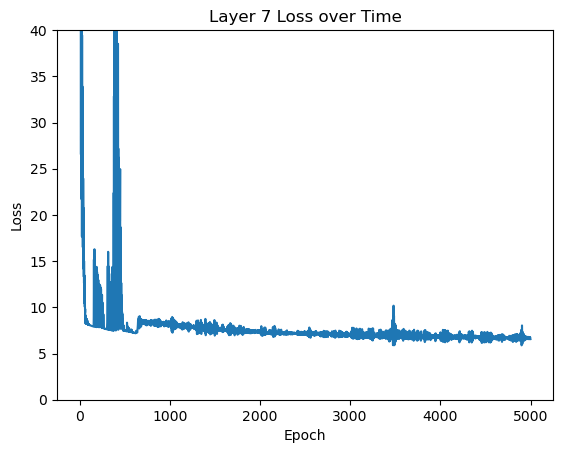

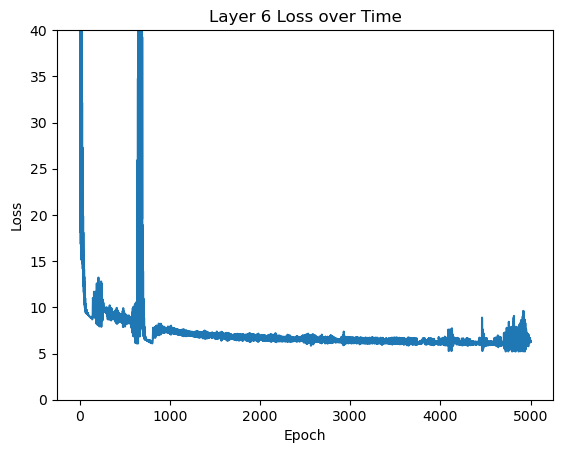

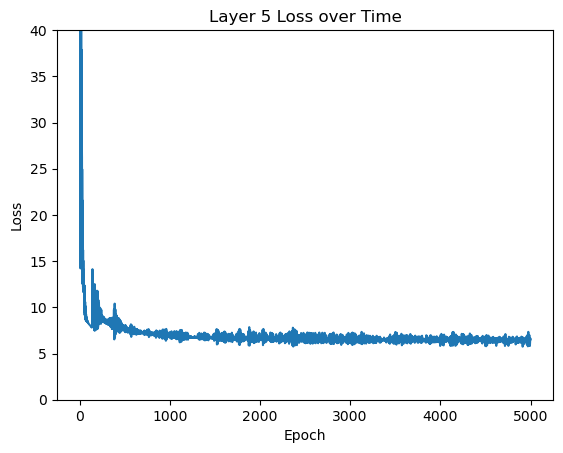

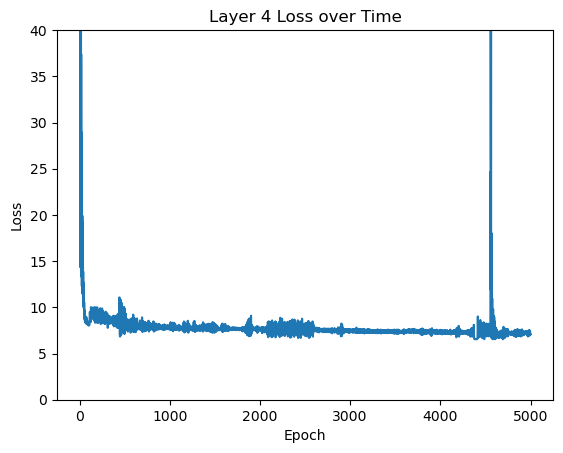

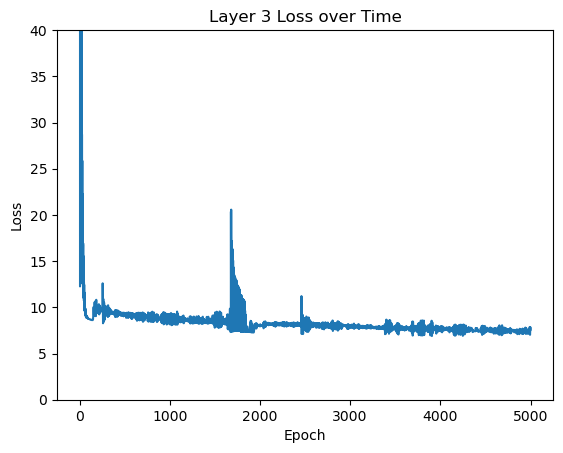

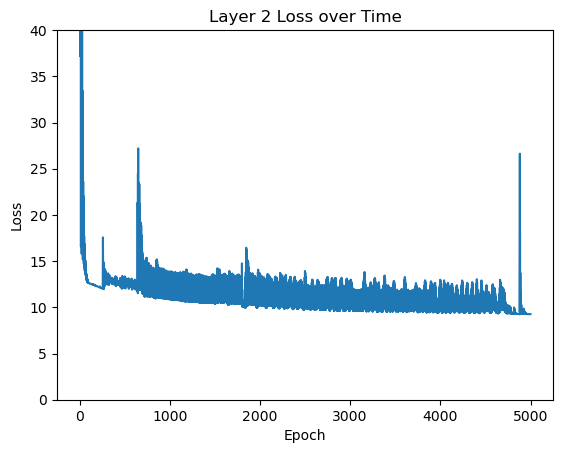

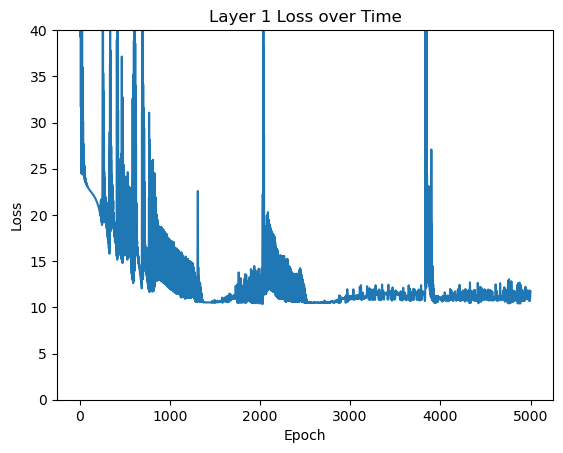

In [ ]:
# plot loss over time for each layer
for i in range(num_layers):
    layer = 11 - i
    plt.plot(loss_lists[f'loss_list{layer}'])
    
    plt.title(f'Layer {layer} Loss over Time')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # limit graph to max loss of 40 (otherwise scale is decieving)
    plt.ylim(0, 40)

    plt.show()

[10.395913124084473, 9.244576454162598, 6.892219066619873, 6.546943664550781, 5.742264270782471, 5.21873140335083, 5.882390022277832, 5.110130786895752, 4.637734889984131, 3.115403652191162, 1.2960623502731323]


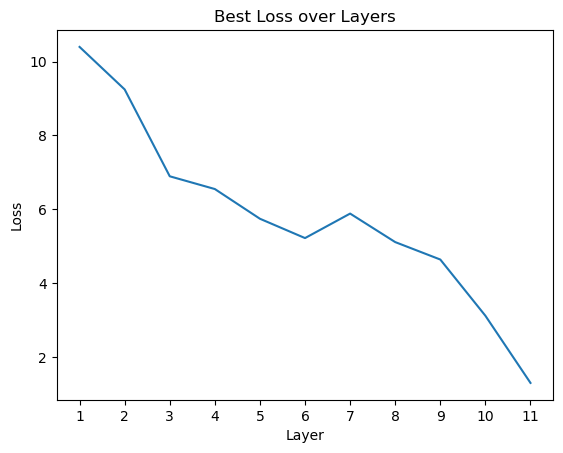

In [ ]:
# plot the best loss for each layer
best_losses.reverse()
print(best_losses)
plt.plot(range(1, len(best_losses) + 1), best_losses)

plt.title("Best Loss over Layers")
plt.xlabel("Layer")
plt.ylabel("Loss")

plt.xticks(range(1, 12))

plt.show()

# Testing 

In [ ]:
import matplotlib.pyplot as plt

# plot temperature predictions vs actual readings
def plot_actual_vs_pred(pred, actual):
    # specify number of samples to graph
    num_graphs = 10
    chunk_size = len(pred) // num_graphs

    # Create an appropriate number of plots
    for i in range(0, len(pred), chunk_size):
        plt.figure()
        
        plt.plot(pred[i], label='Predicted')
        plt.plot(actual[i], label='Actual')

        plt.title("Temperature: Predicted vs Actual")
        plt.xlabel("Silica Layer")
        plt.ylabel("Temperature (K)")
        
        plt.legend()
        plt.show()

Layer 11
sample_predictions: [298.4068298339844]
Layer 10
sample_predictions: [298.4068298339844, 321.0580749511719]
Layer 9
sample_predictions: [298.4068298339844, 321.0580749511719, 318.9964599609375]
Layer 8
sample_predictions: [298.4068298339844, 321.0580749511719, 318.9964599609375, 316.0969543457031]
Layer 7
sample_predictions: [298.4068298339844, 321.0580749511719, 318.9964599609375, 316.0969543457031, 307.267822265625]
Layer 6
sample_predictions: [298.4068298339844, 321.0580749511719, 318.9964599609375, 316.0969543457031, 307.267822265625, 298.04034423828125]
Layer 5
sample_predictions: [298.4068298339844, 321.0580749511719, 318.9964599609375, 316.0969543457031, 307.267822265625, 298.04034423828125, 302.1136474609375]
Layer 4
sample_predictions: [298.4068298339844, 321.0580749511719, 318.9964599609375, 316.0969543457031, 307.267822265625, 298.04034423828125, 302.1136474609375, 300.5257263183594]
Layer 3
sample_predictions: [298.4068298339844, 321.0580749511719, 318.996459960937

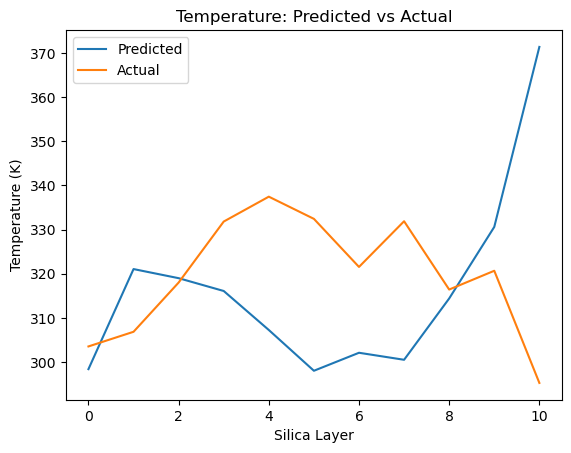

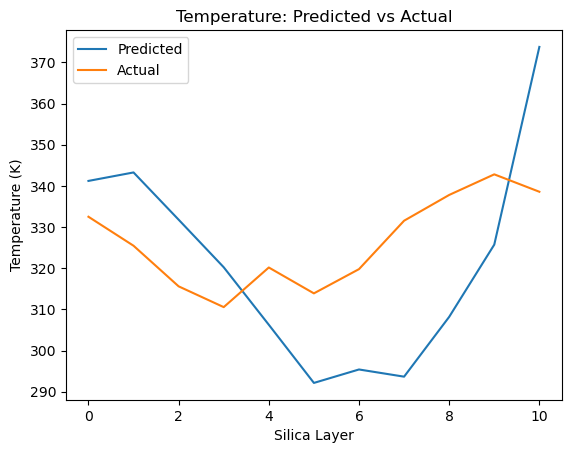

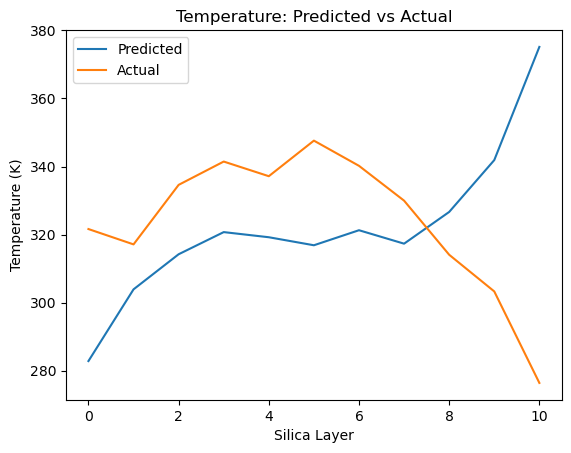

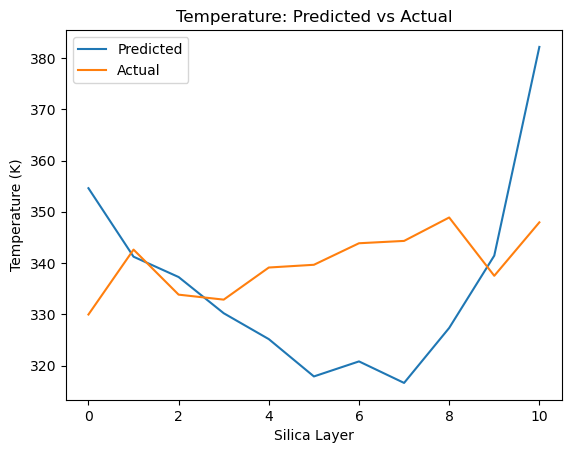

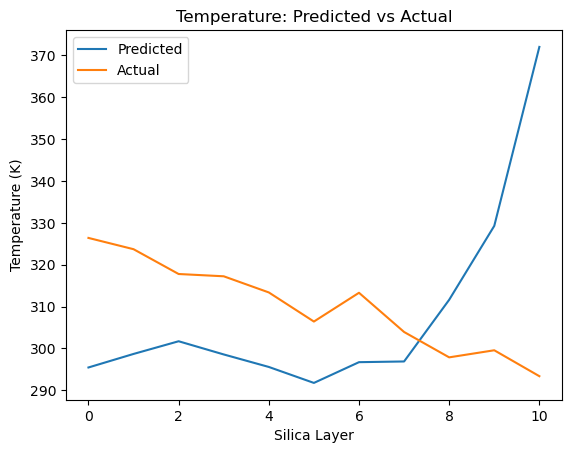

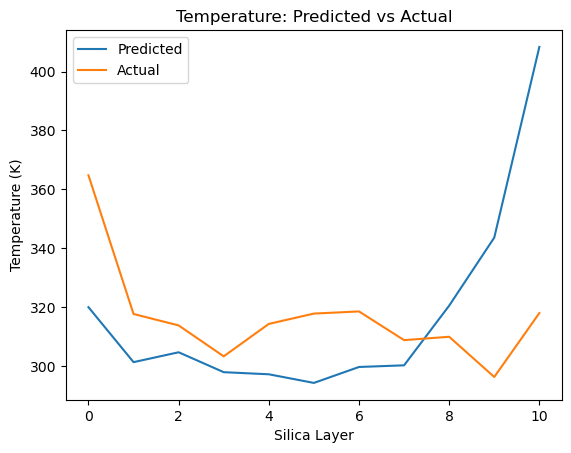

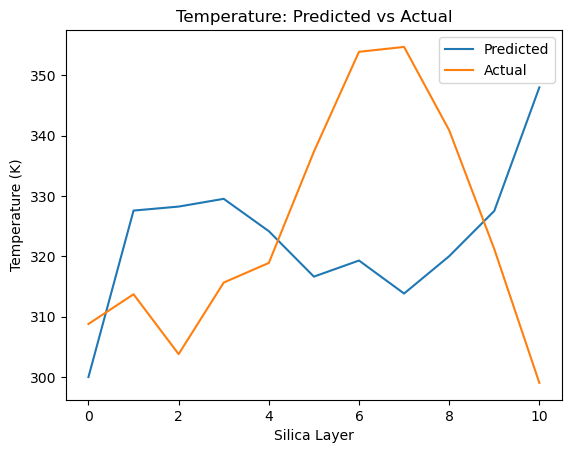

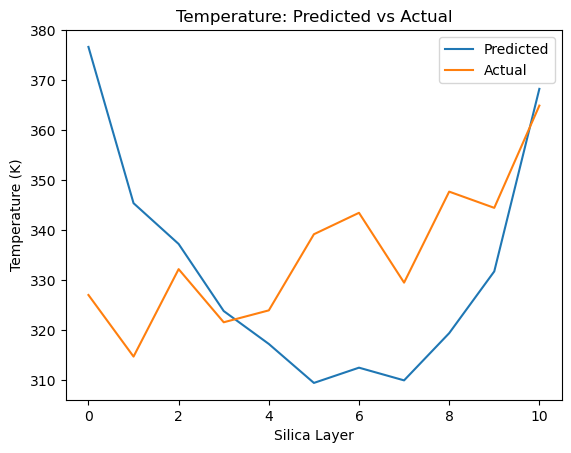

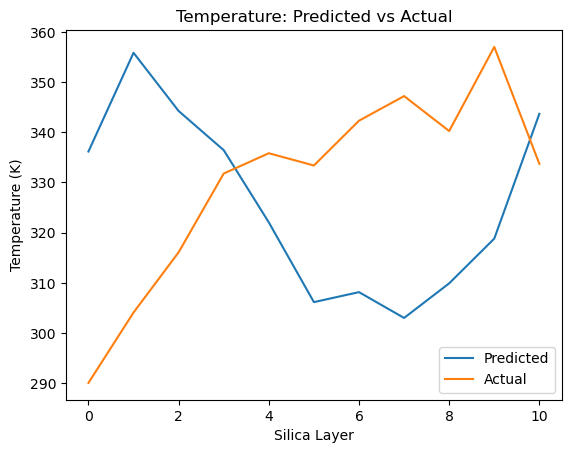

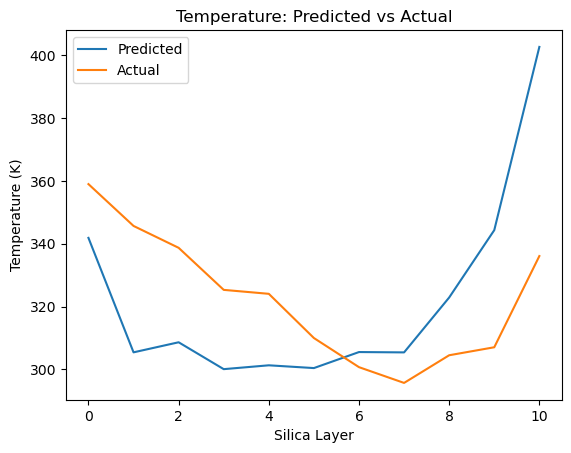

In [ ]:
# convert testing data to tensor
inputs = df_to_tensor(X_test)

# define prediction list (contains sublists for each sample) 
predictions = []

with torch.no_grad():
    for sample in inputs:
        # define new sample prediction list for each sample
        sample_prediction = []

        # iterate through layers to make temperature predictions for each layer sequentially
        for i in range(num_layers):
            layer = 11 - i
            print(f'Layer {layer}')

            # add previous layer's temperature prediction to inputs
            if i > 0:
                layer_pred_reshaped = layer_pred.reshape(1, -1)
                sample_reshaped = sample.reshape(1,-1)
                sample = torch.cat([sample_reshaped, layer_pred_reshaped], dim = 1)

            # define the model corresponding to the given layer
            model = models[f'model{layer}']

            # get temperature prediction and add to sample_prediction list
            layer_pred = model(sample)
            sample_prediction.append(layer_pred.item())
            print(f'sample_predictions: {sample_prediction}')
        
        # once all layers in a given sample have been predicted, add sublist to predictions list
        predictions.append(sample_prediction)

# plot results
actual = df_to_tensor(y_test).tolist()
plot_actual_vs_pred(predictions, actual)
